# Python Project - Steph Curry Shot Data Visualization

Stephen Curry is considered one of the best shot creators in the National Basketball Association. As of this project, Steph Curry has recorded 25,386 points in his career (which is currently 24th all time). Steph Curry is well known for his 3 pointers, where Curry sits as the top 3 point scorer in NBA history with a total of 4,058 as of this project.

For this project, we will do a Python data visualiztion project using real shot data from Steph Curry's 2023 season. This project was inspired through **[AthlyticZ](https://www.youtube.com/watch?v=xZV_1B9rN7o&t=36s).** This project will ask questions that a stakeholder may ask (in this project, a coach or general manager) about the performance of Steph Curry's shooting during the 2023 NBA season. 

This project will be for learning and practice with the following skills being used:
- Pandas
- Numpy
- Matplotlib
- Seaborn

The project will use the following dataset (which was prepared by Dhaval Rupapara): <br>

**[Kaggle - NBA Player Shot Dataset (2023)](https://www.kaggle.com/datasets/dhavalrupapara/nba-2023-player-shot-dataset?resource=download&select=3_stephen_curry_shot_chart_2023.csv)**

In [9]:
## import libraries to help with the projects

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
# CSV Read of 2023 Steph Curry Dataset
curry_df = pd.read_csv("D:\\Data Analytic Projects\\Python Projects\\Steph Curry - 2023 Shooting Performance\\Dataset\\3_stephen_curry_shot_chart_2023.csv")

# For simplicity, rename shot types into readible labels rather than "numerical" labels
curry_df['shot_type'] = curry_df['shot_type'].replace({2: '2-point shot', 3: '3-point shot'})

# Rename "Result" column boolean date type from "True/False" to "Made/Missed"
curry_df['result'] = curry_df['result'].replace({True: 'made', False: 'missed'})

# Print to ensure changes have been properly made
print(curry_df.head())

# Below output resulted in the 'result' column boolean type to 'made/missed' and shot_type being changed to '2-point shot/3-point shot'

   top  left       date      qtr time_remaining  result     shot_type  \
0   63   300  18-Oct-22  1st Qtr           7:27  missed  2-point shot   
1  133   389  18-Oct-22  1st Qtr           7:22    made  2-point shot   
2  326   247  18-Oct-22  1st Qtr           7:11  missed  3-point shot   
3  249    89  18-Oct-22  1st Qtr           5:16  missed  3-point shot   
4  282   158  18-Oct-22  1st Qtr           3:52  missed  3-point shot   

   distance_ft  lead  steph_team_score  opponent_team_score opponent team  \
0            6  True                 9                    6      LAL  GSW   
1           17  True                11                    6      LAL  GSW   
2           27  True                11                    6      LAL  GSW   
3           25  True                19                   13      LAL  GSW   
4           24  True                22                   17      LAL  GSW   

   season  color  
0    2023    red  
1    2023  green  
2    2023    red  
3    2023    red  
4  

## General Performance Questions

1. What is Steph Curry's overall shooting accuracy for the 2023 season?
2. What are Steph Curry's shooting percentages for 2-point vs 3-point shots?
3. How many total shots did Steph Curry attempt and make?

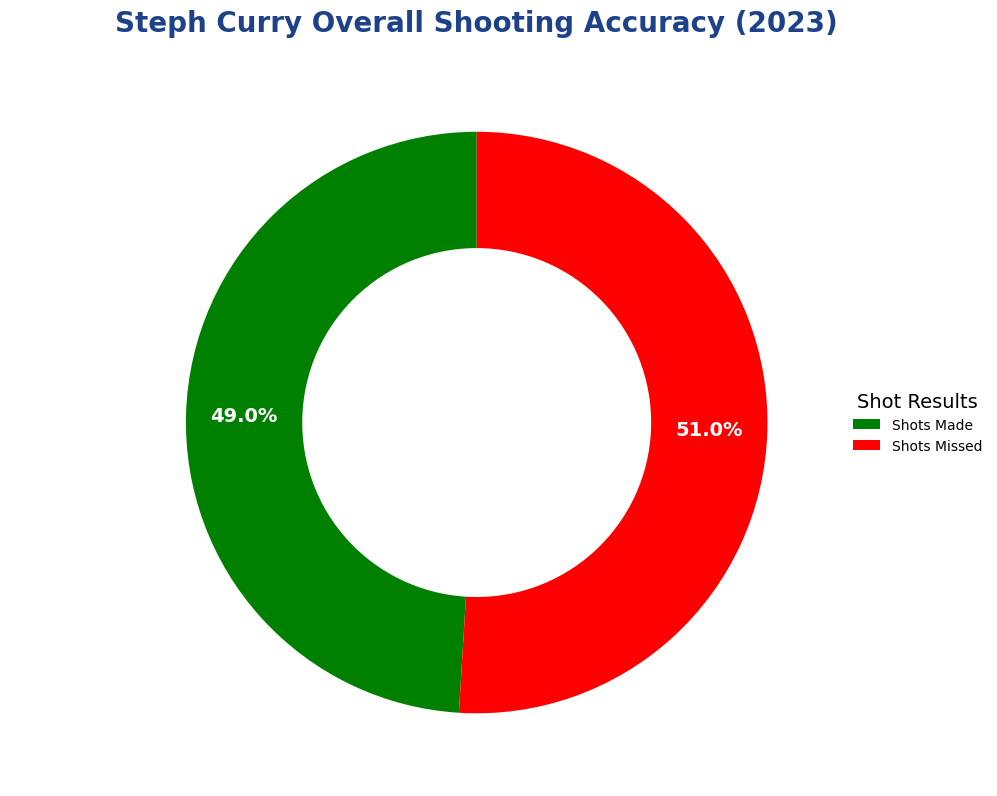

(None, 49.02)

In [62]:
# Question 1 - Shooting Accuracy Calculations

total_shots = len(curry_df)
made_shots = len(curry_df[curry_df['result'] == 'made'])
overall_accuracy = round((made_shots / total_shots) * 100, 2)

# Create Donut Chart for visualizing shooting accuracy
labels = ['Shots Made', 'Shots Missed']
sizes = [made_shots, total_shots - made_shots]
colors = ['green', 'red']

fig, ax = plt.subplots(figsize=(10,10))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels = labels,
    autopct ='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors = colors,
    textprops=dict(color='white', fontsize=16,weight='bold'),
    pctdistance=0.8
)

# Adjust percentages to be more centered
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Title and Legend for Donut Chart
ax.set_title('Steph Curry Overall Shooting Accuracy (2023)', fontsize=20, pad=20, fontweight='bold', color='#1D428A')
plt.legend(wedges, labels, title='Shot Results', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=14, frameon=False)

plt.tight_layout()
plt.show(), overall_accuracy

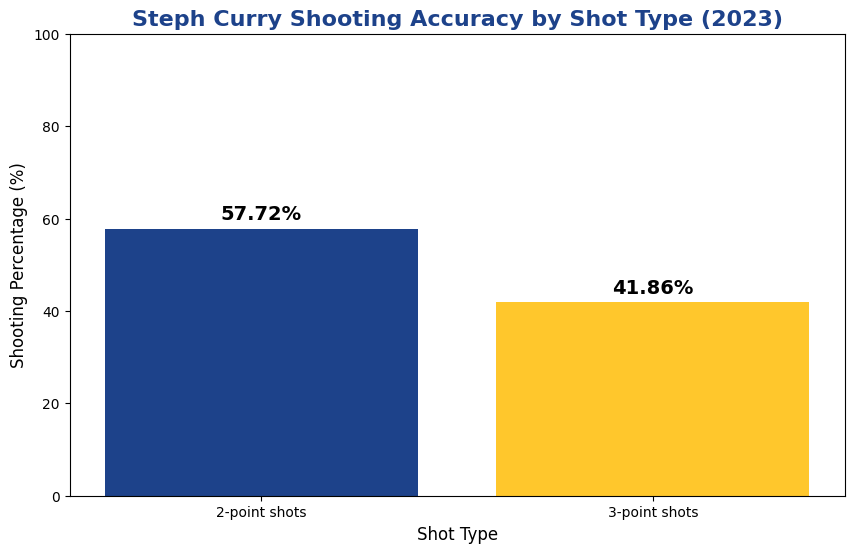

(None, 57.72, 41.86)

In [63]:
# Question 2 - 2- and 3-point shooting percentages

two_point_shots = curry_df[curry_df['shot_type'] == '2-point shot']
three_point_shots = curry_df[curry_df['shot_type'] == '3-point shot']

# Team Colors for Bar Chart
team_colors = ['#1D428A', '#FFC72C']

# Calculations for each shot type
two_point_made = len(two_point_shots[two_point_shots['result'] == 'made'])
two_point_attempts = len(two_point_shots)
two_point_accuracy = round((two_point_made / two_point_attempts) * 100,2)

three_point_made = len(three_point_shots[three_point_shots['result'] == 'made'])
three_point_attempts = len(three_point_shots)
three_point_accuracy = round((three_point_made / three_point_attempts) * 100,2)

# Data prep for bar chart
shot_types = ['2-point shots', '3-point shots']
accuracies = [two_point_accuracy, three_point_accuracy] 

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(shot_types, accuracies, color=team_colors)
plt.title('Steph Curry Shooting Accuracy by Shot Type (2023)', fontsize=16, fontweight='bold', color='#1D428A')
plt.ylabel('Shooting Percentage (%)', fontsize=12)
plt.xlabel('Shot Type', fontsize=12)
plt.ylim(0, 100)

# Add Labels on top of shot-type bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f'{acc}%', ha='center', fontsize=14, fontweight='bold')

plt.show(), two_point_accuracy, three_point_accuracy

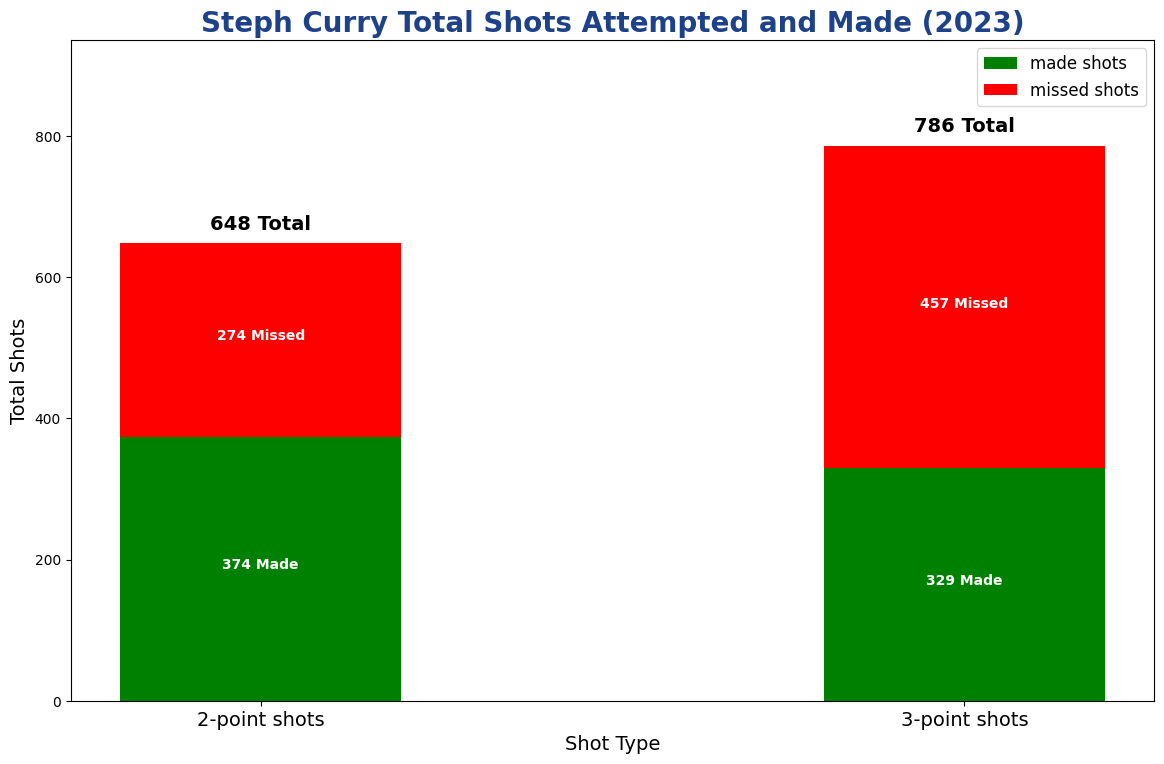

(None, [648, 786], [374, 329], [274, 457])

In [64]:
# Question 3 shot attempts and misses

shot_categories = ['2-point shots', '3-point shots']
attempts = [two_point_attempts, three_point_attempts]
makes = [two_point_made, three_point_made]
misses = [attempts[i] - makes[i] for i in range(2)]

fig, ax = plt.subplots(figsize=(12,8))
bar_width = 0.4
bar_positions = np.arange(len(shot_categories))

# Plot the Stacked Bars for made and missed shots
ax.bar(bar_positions, makes, width=bar_width, color='green', label='made shots')
ax.bar(bar_positions, misses, width=bar_width, bottom=makes, color='red', label='missed shots')

# Add Titles and Labels
ax.set_title('Steph Curry Total Shots Attempted and Made (2023)', fontsize=20, fontweight='bold', color='#1D428A')
ax.set_xticks(bar_positions)
ax.set_xticklabels(shot_categories, fontsize=14)
ax.set_ylabel('Total Shots', fontsize=14)
ax.set_xlabel('Shot Type', fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(0, max(attempts) + 150)

# Total Shot Labels on Top of Stacked Bars
for i in range(len(shot_categories)):
    total = attempts[i]
    made =makes[i]
    missed = misses[i]

# Add Total Shot Labels on Top of the Stacked Bars
    ax.text(i, total + 20, f'{total} Total', ha='center', fontsize=14, fontweight='bold')

# Made Shot Label in green and Missed Shot Label in red
    ax.text(i, made / 2, f'{made} Made', ha='center', color= 'white', fontsize=10, fontweight='bold')
    ax.text(i, made + (missed / 2), f'{missed} Missed', ha='center', color= 'white', fontsize=10, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.show(), attempts, makes, misses

## Shot Distance & Efficiency:

1. What is his field goal percentage at different shot distances (e.g., 0–5 ft, 6–15 ft, 16–24 ft, 25+ ft)?
2. What distance range is his most efficient shooting zone?

In [45]:
# Question 1 - Field goal percentages from different shot distances

# Defining the shot distances
# Note for future - when defining the bins, it appears that when I set the [0] value in the list, it excluded 6 records that were registered as "0 ft from basket shots". For simplicity, I changed the [0] in the list to -1 
distance_bins = [-1, 5, 15, 24, 100]
distance_labels = ['0-5 ft', '6-15 ft', '16-24 ft', '25+ ft']

# Add a distance range column in dataframe
curry_df['distance_range'] = pd.cut(curry_df['distance_ft'], bins=distance_bins, labels=distance_labels, right=True)

# Calulate field goal percentages for each distance range
distance_grouped = curry_df.groupby('distance_range')['result'].value_counts().unstack().fillna(0)
distance_grouped['FG (%)'] = round((distance_grouped['made']/(distance_grouped['made']+distance_grouped['missed'])) * 100,2)

# Display the result to ensure eveything looks okay
distance_grouped_display = distance_grouped[['made', 'missed', 'FG (%)']].reset_index()
distance_grouped_display.columns = ['Distance Range', 'Made', 'Missed', 'FG (%)']
distance_grouped_display.sort_values(by='Distance Range', inplace=True)

distance_grouped_display

,Distance Range,Made,Missed,FG (%)
0,0-5 ft,221,106,67.58
1,6-15 ft,97,97,50.00
2,16-24 ft,103,110,48.36
3,25+ ft,282,418,40.29


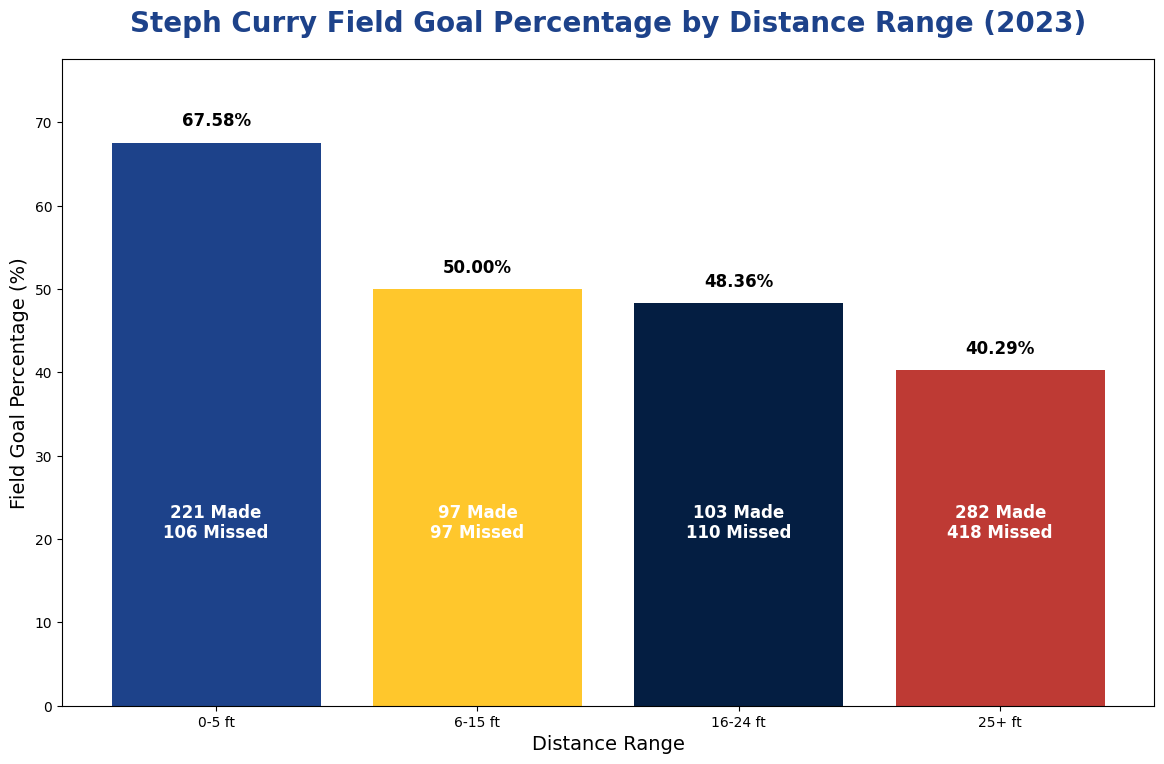

In [65]:
# Create Bar Chart

plt.figure(figsize=(12,8))

# Golden State Warrior Color Palatte
team_colors = ['#1D428A', '#FFC72C', '#041E42', '#BE3A34']

# Plot the FG Percentage for each distance (using Golden State Color Palletes)

bars = plt.bar(distance_grouped_display['Distance Range'], distance_grouped_display['FG (%)'], color=team_colors)

# Title and Labels
plt.title('Steph Curry Field Goal Percentage by Distance Range (2023)', fontsize=20, pad=20, fontweight='bold', color='#1D428A')
plt.xlabel('Distance Range', fontsize=14)
plt.ylabel('Field Goal Percentage (%)', fontsize=14)
plt.ylim(0, distance_grouped_display['FG (%)'].max() + 10)

# Add Data Labels inside bars for makes and misses
for i, bar in enumerate(bars):
    made = distance_grouped_display.loc[i, 'Made']
    missed = distance_grouped_display.loc[i, 'Missed']
    plt.text(bar.get_x() + bar.get_width() / 2, fg_percent / 2, f"{made} Made\n{missed} Missed", ha='center', fontsize=12, color='white', fontweight='bold')

# Add Data Labels
for i, fg_percent in enumerate(distance_grouped_display['FG (%)']):
    plt.text(i, fg_percent + 2, f'{fg_percent:.2f}%', ha='center', fontsize = 12, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.show()

## Shot Location Analysis

1. Provide a visual of Curry's makes and misses for the whole season?
2. Provde a visual of Curry's heatzones on where his typically shoots the most?

In [44]:
# NBA Court for Shot Location Analysis

# Coordinate conversion function

def convert_coord(df):
    """
    Converts shot coordinates from image-based space to court space

    Assumes:
    - 'Left' ranges from 0 to approximately 480 (image pixels) -> center it around 0
    - 'top' already increases from basket to halfcourt, no flip needed
    """
    df['court_x'] = df['left'] - 240 # Center X around 0 to match court
    df['court_y'] = df['top'] # is already in the correct direction

    return df

# Apply coordinate conversion to Curry's shot data
curry_df = convert_coord(curry_df)

# Court Drawing Function

def draw_nba_court(axis=None):
    """
    Draws an NBA halfcourt using matplotlib primitives.

    Args:
        axis (matplotlib axis): Optional axis to draw on. Creates one if not provided.

    Returns:
        fig, axis: Figure and axis with the court drawn
    """
    if axis is None:
        fig = plt.figure(figsize=(9, 9))
        axis = fig.add_subplot(111, aspect='auto')
    else:
        fig = None

    # --- Court Outline (Baseline, Sidelines, Halfcourt Line) ---
    axis.plot([-250, 250], [-47.5, -47.5], 'k-')     # Baseline
    axis.plot([-250, -250], [-47.5, 422.5], 'k-')    # Left sideline
    axis.plot([250, 250], [-47.5, 422.5], 'k-')      # Right sideline
    axis.plot([-250, 250], [422.5, 422.5], 'k-')     # Halfcourt line

    # --- Backboard ---
    axis.plot([-30, 30], [-10, -10], 'k-', lw=2)

    # --- Paint / Lane ---
    axis.plot([-80, -80], [-47.5, 142.5], 'k-')
    axis.plot([80, 80], [-47.5, 142.5], 'k-')
    axis.plot([-60, -60], [-47.5, 142.5], 'k-')
    axis.plot([60, 60], [-47.5, 142.5], 'k-')
    axis.plot([-80, 80], [142.5, 142.5], 'k-')     # Free throw line

    # --- Hoop and Restricted Area ---
    hoop = Arc((0, 0), 15, 15, theta1=0, theta2=360, lw=1.5, color='black')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, lw=1.5, color='black')
    axis.add_patch(hoop)
    axis.add_patch(restricted)

    # --- Free Throw Circle ---
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1=0, theta2=180, lw=1.5, color='black'))     # Top half
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1=180, theta2=360, lw=1.5, linestyle='--', color='black'))  # Bottom half (dashed)

    # --- 3-Point Lines ---
    axis.plot([-220, -220], [-47.5, 92.5], 'k-')     # Left corner 3
    axis.plot([220, 220], [-47.5, 92.5], 'k-')       # Right corner 3
    axis.add_patch(Arc((0, 0), 475, 475, theta1=22, theta2=158, lw=1.5, color='black'))   # 3-pt arc

    # --- Halfcourt Circle ---
    axis.add_patch(Arc((0, 422.5), 122, 122, theta1=180, theta2=360, lw=1.5, color='black'))

    # --- Axis Settings ---
    axis.set_xlim(-250, 250)
    axis.set_ylim(-47.5, 470)
    axis.set_aspect(1)     # Equal aspect ratio
    axis.axis('off')       # Hide axes

    return fig, axis


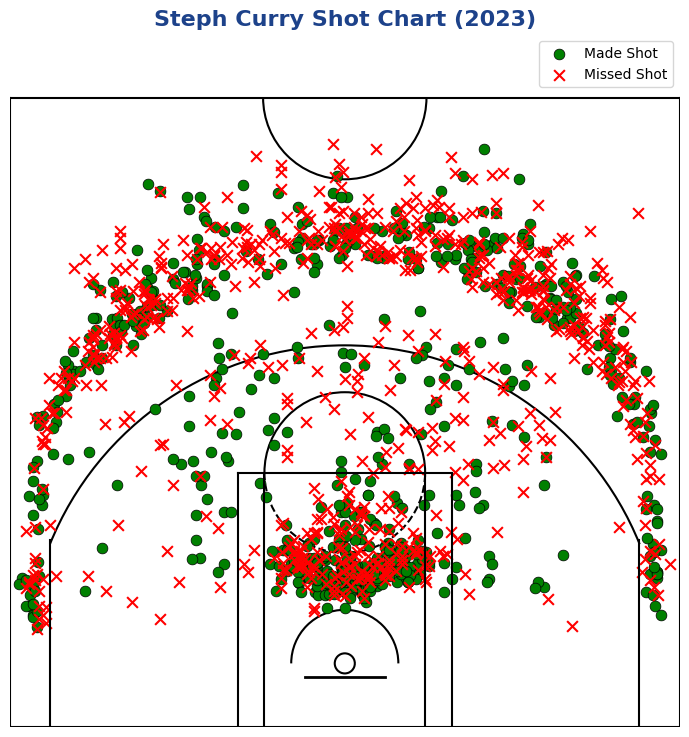

In [66]:
#

# Create Plot and Axis
fig, ax = plt.subplots(figsize=(9, 9))

# Halfcourt Graph
draw_nba_court(ax)

# Plot made shots (green circles)
made_shots = curry_df[curry_df['result'] == 'made']
ax.scatter(
    made_shots['court_x'],
    made_shots['court_y'],
    c='green',
    marker='o',
    edgecolors='black',
    linewidths=0.5,
    s=60,
    label='Made Shot'
)

# Plot missed shots (red Xs)
missed_shots = curry_df[curry_df['result'] == 'missed']
ax.scatter(
    missed_shots['court_x'],
    missed_shots['court_y'],
    c='red',
    marker='x',
    linewidths=1.5,
    s=60,
    label='Missed Shot'
)

# Title and legend
plt.title("Steph Curry Shot Chart (2023)", fontsize=16, fontweight='bold', color='#1D428A')
ax.legend(loc='upper right')
plt.show()


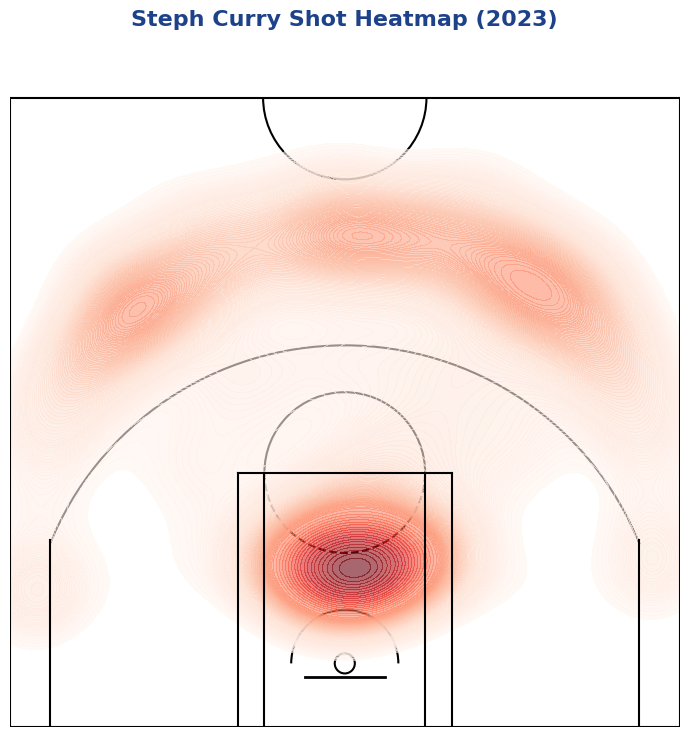

In [67]:
# Heatmap Visualization - Hotzones where Curry typically shoots

# Create Plot and Axis
fig, ax = plt.subplots(figsize=(9,9))

#Draw halfcourt on axis
draw_nba_court(ax)
kde = sns.kdeplot(
    x=curry_df['court_x'],
    y=curry_df['court_y'],
    fill=True,
    cmap='Reds',
    bw_adjust=0.8,
    alpha=0.6,
    levels=100,
    thresh=0.05,
    ax=ax
)

plt.title('Steph Curry Shot Heatmap (2023)', fontsize=16, fontweight='bold', color='#1D428A')
plt.show()